### **DBSCAN - Density-Based Spatial Clustering of Applications with Noise**

For clustering, DBSCAN works best on **geospatial / density-based datasets**.
Good Kaggle options:

1. **Mall Customers Dataset** (customer segmentation → business application)
2. **NYC Taxi GPS Data** (geospatial density clustering → traffic hotspots)
3. **Iris Dataset** (classic example → easy to visualize)

Let’s use **Mall Customers Dataset** for a **real business segmentation use case**.

### **Install & Import Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

### **Load Dataset**

In [2]:
!curl -L -o mall-customers.zip\
  https://www.kaggle.com/api/v1/datasets/download/lokkagle/mall-customers

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1583  100  1583    0     0   1755      0 --:--:-- --:--:-- --:--:--  8420


In [3]:
!unzip mall-customers.zip

Archive:  mall-customers.zip
  inflating: Mall_Customers.csv      


In [4]:
# Download Mall Customers dataset from Kaggle
df = pd.read_csv("Mall_Customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### **Data Preprocessing**

In [7]:
# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [8]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **Apply DBSCAN**

In [9]:
# Build DBSCAN model
db = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)

In [10]:
# Assign cluster labels
df['Cluster'] = db.labels_

In [11]:
# Check results
df['Cluster'].value_counts()

,count
Cluster,
0,157
1,35
-1,8


* **Cluster = -1** → Noise points
* Other numbers → Cluster IDs

### **Visualize Clusters**

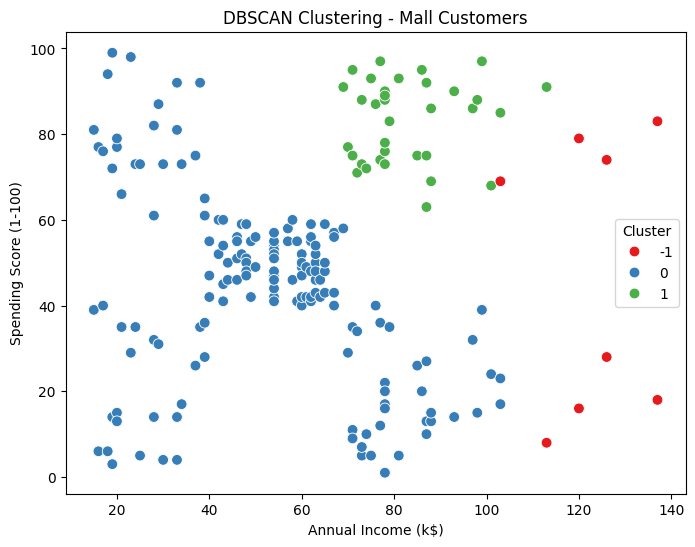

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=df['Cluster'], palette='Set1', s=60)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN Clustering - Mall Customers")
plt.show()

### **Analyze Results**

1. **Profile each cluster** by checking mean values of Age, Income, Spending:

In [13]:
df.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
-1,35.750000,122.750000,46.875000
0,40.369427,52.490446,43.101911
1,32.742857,82.542857,82.800000


2. **Visualize with pairplots / scatterplots**:

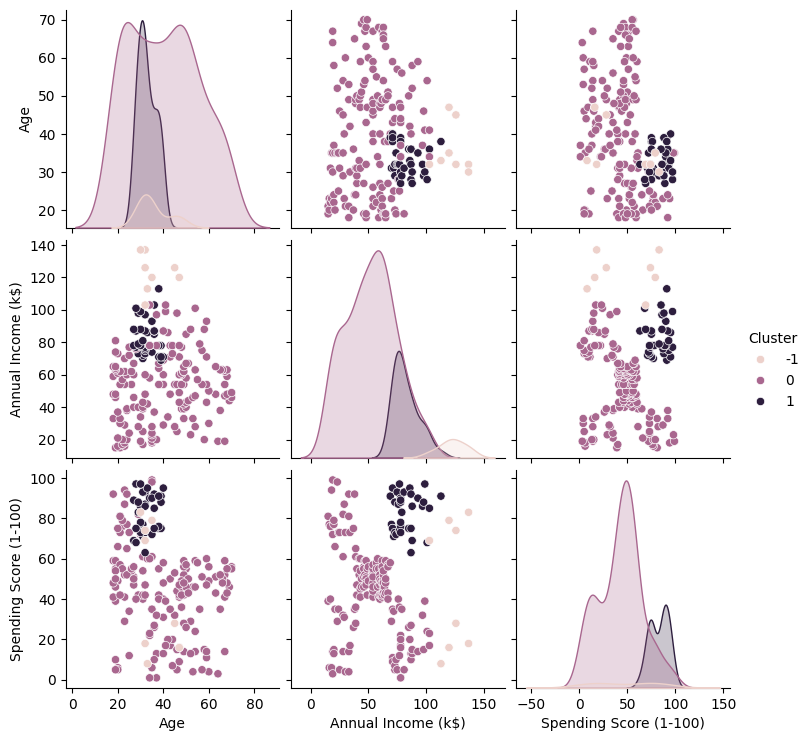

In [14]:
sns.pairplot(df, hue="Cluster", vars=['Age','Annual Income (k$)','Spending Score (1-100)'])
plt.show()

3. **Actionable Insights**:

   * Cluster 0 → Your **general customers** (needs mass campaigns).
   * Cluster 1 → **Special attention group** (loyalty programs, premium offers).
   * Noise (-1) → Check individually → possible **outliers**.

#### **Business Application**

* Marketing teams can **target specific clusters**:

  * Premium customers → loyalty programs
  * Budget customers → discounts
  * Outliers → fraud detection

### **Train-Test Workflow (Optional)**

DBSCAN is **unsupervised** (no train/test split needed).
But you can **split for evaluation** if comparing with supervised tasks.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

In [17]:
db_train = DBSCAN(eps=0.5, min_samples=5).fit(X_train)
train_labels = db_train.labels_

In [18]:
db_test = DBSCAN(eps=0.5, min_samples=5).fit(X_test)
test_labels = db_test.labels_
test_labels

array([ 0, -1, -1, -1,  1,  0,  0,  1,  1,  0,  0,  1, -1,  0, -1, -1,  0,
        1,  0,  0,  1, -1,  1,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0,  0,
        1,  0, -1, -1,  1,  0])

### **Parameter Tuning**

* Use **k-distance graph** to find optimal `eps`:

In [19]:
from sklearn.neighbors import NearestNeighbors

In [20]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

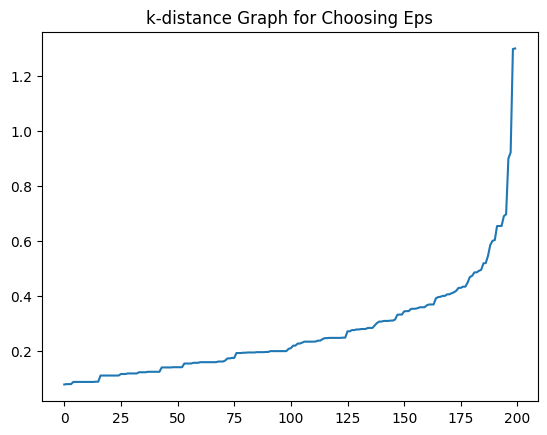

In [21]:
distances = np.sort(distances[:,4], axis=0)
plt.plot(distances)
plt.title("k-distance Graph for Choosing Eps")
plt.show()

### **Summary**

* DBSCAN identified **natural clusters in customer behavior**.
* No need to specify number of clusters like K-means.
* Detected **outliers** (fraud/unusual spenders).
* Real-world use: **Customer segmentation, anomaly detection, business insights**.